# Extract npz files and generate plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FlexibleWM import *

import time
from datetime import datetime
import ipdb


In [2]:
# Start the timer
start_time = time.time()

# Set the current time as 'name_simu' (e.g., formatted as Year-Month-Day_Hour-Minute-Second)
time_simu = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print(f"Simulation start time: {time_simu}")

# sim_name = 'trials/{time_simu}'
sim_name = 'FindTuningCurve_rcn'

folder_path = f'./FlexibleWM/{sim_name}'

dictionnary={
    'name_simu':f'FlexibleWM/{sim_name}',
    'Number_of_trials':30,
    'num_stimuli_gird':50,
    'num_cores':7,
    'compute_tuning_curve':False, # Reuse tuning curve
    'same_network_to_use':True,
    # 'create_a_specific_network':True
    } # Add here any parameter you want to change from default. Defaults values are at the beginning of FlexibleWM.py
MyModel = FlexibleWM(dictionnary)
MyModel.find_tuning_curve()
# gcPython.collect() 

# End the timer
end_time = time.time()

# Calculate the total running time
total_time = end_time - start_time
print(f"Total running time: {total_time:.2f} seconds")

Simulation start time: 2024-09-25_20-20-31


Outer Loop (trials):   0%|          | 0/30 [00:00<?, ?it/s]

All results saved in the folder
Total running time: 1455.30 seconds


  cmap = plt.cm.get_cmap('hsv', 512)  # HSV colormap with 512 distinct colors

  axs[0].legend()

  axs[1].legend()

  plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space at the bottom for colorbars



psth_rn (30, 50, 512)
psth_rcn (30, 50, 1024)
firing_rate_rn (50, 512)
firing_rate_rcn (50, 1024)


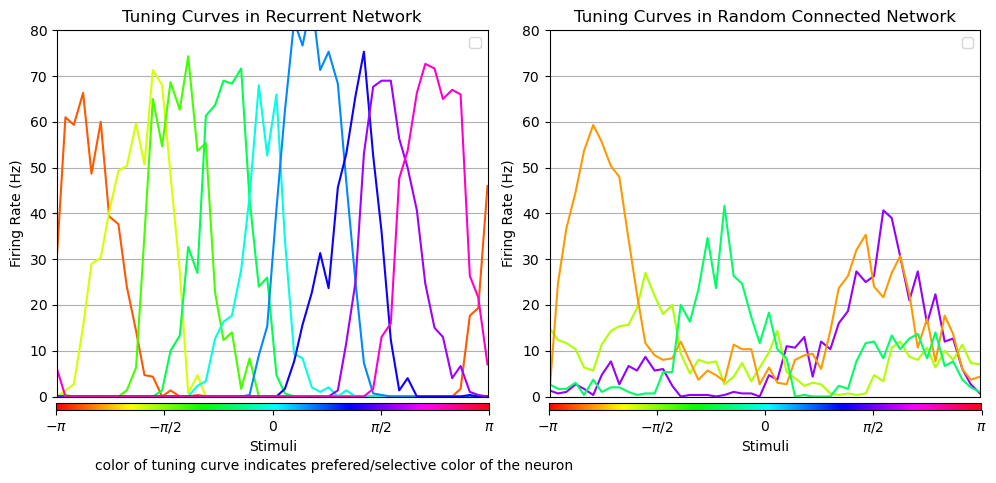

In [14]:
# Load the Matrix_tuning.npz file
npzfile = np.load(f'{folder_path}/simulation_psth.npz')
psth_rn = npzfile['psth_rn']
psth_rcn = npzfile['psth_rcn']
stimuli_list = npzfile['stimuli_list']
npzfile.close()

print('psth_rn', psth_rn.shape)
print('psth_rcn', psth_rcn.shape)
firing_rate_rn = np.average(psth_rn, axis=0) / 0.1  # Average over trials. Spike counts / 100ms
firing_rate_rcn = np.average(psth_rcn, axis=0) / 0.1  # Average over trials. Spike counts / 100ms
print('firing_rate_rn', firing_rate_rn.shape)
print('firing_rate_rcn', firing_rate_rcn.shape)

# Example plot with overlayed lines colored by their index
neuron_indices_rn = [30, 100, 150, 200, 250, 300, 350, 400, 450]  # Example indices for lines to plot
neuron_indices_rcn = [100, 300, 500, 800]  # Example indices for lines to plot

color_axis = (stimuli_list / 512 - 0.5) * 2 * np.pi

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot: Tuning curves plot
cmap = plt.cm.get_cmap('hsv', 512)  # HSV colormap with 512 distinct colors
for idx in neuron_indices_rn:
    color = cmap(idx / 512.0)  # Normalize index to [0,1] and get color
    axs[0].plot(color_axis, firing_rate_rn[:, idx], color=color)

for idx in neuron_indices_rcn:
    color = cmap(stimuli_list[np.argmax(firing_rate_rcn[:, idx])]/512) #cmap(idx / 512.0)  # Normalize index to [0,1] and get color
    axs[1].plot(color_axis, firing_rate_rcn[:, idx], color=color)

# Set titles, labels, limits, and grids
axs[0].set_title('Tuning Curves in Recurrent Network')
# axs[0].set_xlabel('Stimuli (colors)')
axs[0].set_ylabel('Firing Rate (Hz)')
axs[0].set_xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
axs[0].set_ylim([0, 80])
axs[0].set_xticks([])
# axs[0].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axs[0].grid(True)
axs[0].legend()

axs[1].set_title('Tuning Curves in Random Connected Network')
# axs[1].set_xlabel('Stimuli (colors)')
axs[1].set_ylabel('Firing Rate (Hz)')
axs[1].set_xlim([-np.pi, np.pi])  # Ensure the x-axis spans from -pi to pi
axs[1].set_ylim([0, 80])
axs[1].set_xticks([])
# axs[1].set_xticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
axs[1].grid(True)
axs[1].legend()

# Create a scalar mappable for the color bar (showing colors from -pi to pi)
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add two identical colorbars beneath the plots
cbar_ax1 = fig.add_axes([0.0612, 0.17, 0.433, 0.015])  # Position for colorbar 1
cbar_ax2 = fig.add_axes([0.5535, 0.17, 0.433, 0.015])  # Position for colorbar 2

# Create the colorbars
cbar1 = plt.colorbar(sm, cax=cbar_ax1, orientation='horizontal')
cbar2 = plt.colorbar(sm, cax=cbar_ax2, orientation='horizontal')

# Set colorbar labels
cbar1.set_label(r'Stimuli')
cbar2.set_label(r'Stimuli')
cbar1.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cbar1.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
cbar2.set_ticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cbar2.set_ticklabels([r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
# Adjust layout for better spacing

fig.text(0.1,0.05,'color of tuning curve indicates prefered/selective color of the neuron')

plt.tight_layout(rect=[0, 0.15, 1, 1])  # Leave space at the bottom for colorbars
# Show the figure
plt.show()